# INPUT: 4-col tsv readable text from 4-col tsv full content file
* The input should be a tsv table with "", neo_search_transaction_id, variable, value

# Take two visible text files and create map of xy word cross counts
* Open both files and gather all words in two separate lists.
* Create a dictionary of tuples containing counts for each word ex: "word":(x times in file 1, y times in file 2)

In [1]:
! pwd
! touch me
! ls data/
import pandas as pd
# view = pd.read_csv('data/yes_matches.tsv', delimiter='\t')
# view.head()

/Volumes/Transcend/repos/fingerprint_viewer/notebooks
combined_matches.tsv  yes_matches.tsv       yes_test.tsv
no_test.tsv           yes_matches_lines.tsv


In [25]:
# input two files with visible text per line and output a dictionary with x,y coordinates for words
target    = "data/yes_matches.tsv"
reference = "data/no_matches.tsv"
import re
from collections import defaultdict
import json
def reformat_words(line_words):
    words = re.sub(r'\s+', ' ', line_words)
    words = words.lower()
    # HACK because later on we trip on " when we try to generate arrays
    words = words.replace('"', '')
    return [word for word in re.split(r'(\W)', words) if (not len(word.strip()) == 0) and (word.strip().isalpha())]


def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1
from collections import defaultdict
debug = False
# Helper function to extract all text from a single file
def get_dict_word_pairs(source_file1, source_file2):
    word_dict = {}
    column_with_text = 3
    
    lengths = [0,0]
    for idx, source_file in enumerate([source_file1, source_file2]):
        with open(source_file, 'r') as source:
            for line in source:
                full_text = line.split('\t')[column_with_text]
                
                words = reformat_words(full_text)
                
                for idx_word, word in enumerate(words):
                    lengths[idx] += 1
                    try:
                        word_dict[word][idx] += 1
                    except:
                        word_dict[word] = [0,0]
                        word_dict[word][idx] += 1
                    if idx_word+1 < len(words):
                        try:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                        except:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])] = [0,0]
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                    if idx_word+2 < len(words):
                        try:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
                        except:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])] = [0,0]
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
    
    
    ratio = float(lengths[0])/(lengths[1] + 1)
    print("Lengths, TARGET: {}\tREFERENCE: {}\tRATIO: {}".format(lengths[0], lengths[1], ratio))
    # Assuming you always have MORE in the ref context file, normalize the numbers (scale  y)
    for key, val in word_dict.iteritems():
        word_dict[key] = [val[0], int(ratio*val[1] )]
    return word_dict


word_dict = get_dict_word_pairs(target, reference)
with open('word_dict.csv', 'w') as target:
    for k, v in word_dict.items():
        target.write("{},{},{}\n".format(k, v[0], v[1]))
! pwd
! open word_dict.csv
print "DONE, FOUND THIS MANY WORDS COUNTS:", len(word_dict)  


Lengths, TARGET: 276042	REFERENCE: 38660	RATIO: 7.14006363001
/Volumes/Transcend/repos/fingerprint_viewer/notebooks
DONE, FOUND THIS MANY WORDS COUNTS: 288298


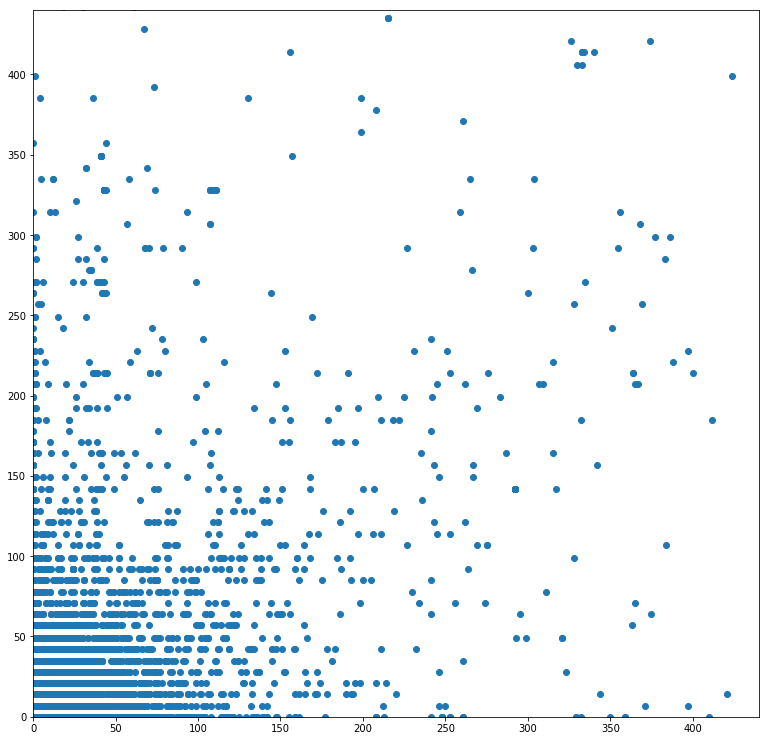

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

xarr = []
yarr = []
for word, xy_pair in word_dict.iteritems():
    xarr.append(xy_pair[0])
    yarr.append(xy_pair[1])
    

plt.figure(figsize = (13,13))
size = 440
plt.axis([0,size,0,size])
plt.scatter(xarr,yarr)
plt.show()

In [22]:
# sort through the dictionary and pull out the words closes to the axis of language we want
import math

def get_top_hits(word_dict, topn=20000, xmin=2, cut_angle=10, xmax=6000000, ymin=2, ymax=100099):
    final_list = []
    for word, xy in word_dict.iteritems():
        if xy[0] <= xmax and xy[0] >= xmin and xy[1] <= ymax and xy[1] >= ymin:
            if float(xy[1])/float(xy[0]+1) < math.tan(math.radians(cut_angle)):
                #print word, xy[0], xy[1], "\t",float(xy[1])/float(xy[0]+1), math.tan(math.radians(cut_angle))
                final_list.append( (word, xy))
    
    final_list.sort(key=lambda x: x[1][0])
    final_list.reverse()
    return final_list[:topn]

def stringify_list(lhits):
    ret_strings = []
    for hit in lhits:
        #ret_strings.append("\"(\\W {}|{} \\W)\"".format(hit[0], hit[0]))
        ret_strings.append("\" {} \"".format(hit[0]))
    return ','.join(ret_strings)
    
        
final_list = get_top_hits(word_dict, 2000)
#print stringify_list(final_list)
if True:
    for item in final_list:
        print item

('price', [2903, 178])
('prices', [2367, 57])
('shrimp', [1024, 92])
('bar', [768, 71])
('sauce', [679, 99])
('served', [631, 21])
('grilled', [535, 7])
('salad', [465, 49])
('drinks', [421, 14])
('crab', [397, 7])
('the food', [375, 64])
('garlic', [371, 7])
('night', [363, 57])
('lobster', [344, 14])
('value', [323, 28])
('s jpg images', [321, 49])
('s jpg', [321, 49])
('photo s jpg', [299, 49])
('choice of', [293, 49])
('events', [261, 35])
('wine', [250, 7])
('salmon', [246, 7])
('atmosphere', [246, 28])
('good for', [220, 14])
('side', [214, 21])
('music', [212, 7])
('bars', [208, 21])
('wood', [198, 21])
('on a', [195, 21])
('drink', [194, 14])
('chinese', [193, 14])
('food was', [190, 14])
('dining', [190, 21])
('soup', [178, 14])
('food is', [174, 21])
('selection', [172, 14])
('fries', [172, 28])
('the service', [171, 14])
('sausage', [166, 21])
('pasta', [165, 14])
('hour', [165, 28])
('happy', [161, 14])
('full', [159, 14])
('service was', [146, 21])
('food and', [143, 14])


In [17]:
# Final cell, choose a reference language, and get list of keywords against that for the others.
groups = [
    "yes",
    "no"
]
# source of interest should be source_2, which ends up on x axis <->
REF_GROUP = "combined"


path_ref_group = "data/{}_matches.tsv".format(REF_GROUP)

for group in groups:
    path_group = "data/{}_matches.tsv".format(group)
    word_dict = get_dict_word_pairs(path_group, path_ref_group)
    final_list = get_top_hits(word_dict, 200)
    length_list = len(final_list)
    print "    [\n        \"--{} {}--\", {},\n    ],".format(group, length_list, stringify_list(final_list))


Lengths, TARGET: 379	REFERENCE: 776	RATIO: 0.488402061856
    [
        "--yes 200--", " date : false "," Linguini "," 5 , Value "," false , text "," Served with choice "," . The service "," : 16 . "," Oz . "," Tavern "," text : null "," . Food "," price : 16 "," Good for a "," bar , "," Cup "," null , quote "," of side } "," Happy Hour "," the restaurant "," answer "," and - "," a few "," ambiance "," Pan "," value : 5 "," Shrimp & "," was good "," portions "," Cal } , "," l / 05 "," side } , "," 9 . 95 "," Hand - "," . ] "," . Good "," : 23 "," P "," a Date "," Served with rice "," lettuce , "," waitress "," . ] } "," for a Date "," We had "," waiter "," , shrimp "," , avocado , "," Grill "," 14 . 95 "," sum "," back . "," bars "," 4 , service "," extra "," categories : Bars "," - 10 - "," dirty rice } "," - 08 - "," to eat "," . But "," breakfast "," 08 - "," & Cheese "," chinese "," Sausage "," pork "," l / 10 "," l / 0e "," appetizer "," was not "," , 2005 "," Saturday "," Baked "